In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer

In [52]:
url = 'https://www.kaggle.com/datasets/supriyoain/water-quality-data'


In [53]:
data = pd.read_csv('waterquality.csv')

In [15]:
print(df.head())

         Date  Salinity (ppt)  DissolvedOxygen (mg/L)   pH  SecchiDepth (m)  \
0  1989-05-11             NaN                     NaN  7.5              0.3   
1  1989-05-18             NaN                    12.0  7.5              0.2   
2  1989-05-25             NaN                     NaN  8.0              0.4   
3  1989-06-01             NaN                    12.0  8.0              0.4   
4  1989-07-11             NaN                     NaN  8.5              0.3   

   WaterDepth (m)  WaterTemp (C)  AirTemp (C)  
0             0.9           17.0   -17.777778  
1             0.6           17.5    20.500000  
2             0.8           23.0    25.000000  
3             0.9           25.5    29.000000  
4             0.9           28.5    28.000000  


In [47]:
print(data.describe())

       Salinity (ppt)  DissolvedOxygen (mg/L)           pH  SecchiDepth (m)  \
count     2241.000000             1520.000000  2276.000000      2298.000000   
mean         0.717068                6.646263     7.168212         0.524898   
std          1.230819                2.506608     0.788485         0.473663   
min          0.000000                0.000000     0.300000         0.000000   
25%          0.000000                4.800000     6.500000         0.300000   
50%          0.000000                6.500000     7.000000         0.400000   
75%          1.000000                8.500000     7.500000         0.650000   
max          9.000000               15.100000     9.900000         9.000000   

       WaterDepth (m)  WaterTemp (C)  AirTemp (C)  
count     2300.000000    2250.000000  2371.000000  
mean         0.762559      18.062138    15.663050  
std          0.621140       8.298246    10.314720  
min          0.010000       0.000000   -17.777778  
25%          0.400000      1

In [48]:
print("Tipos de dados:", data.dtypes)

Tipos de dados: Date                       object
Salinity (ppt)            float64
DissolvedOxygen (mg/L)    float64
pH                        float64
SecchiDepth (m)           float64
WaterDepth (m)            float64
WaterTemp (C)             float64
AirTemp (C)               float64
dtype: object


In [16]:
print(df.isnull().sum())

Date                        5
Salinity (ppt)            130
DissolvedOxygen (mg/L)    851
pH                         95
SecchiDepth (m)            73
WaterDepth (m)             71
WaterTemp (C)             121
AirTemp (C)                 0
dtype: int64


In [17]:
df = df.dropna()

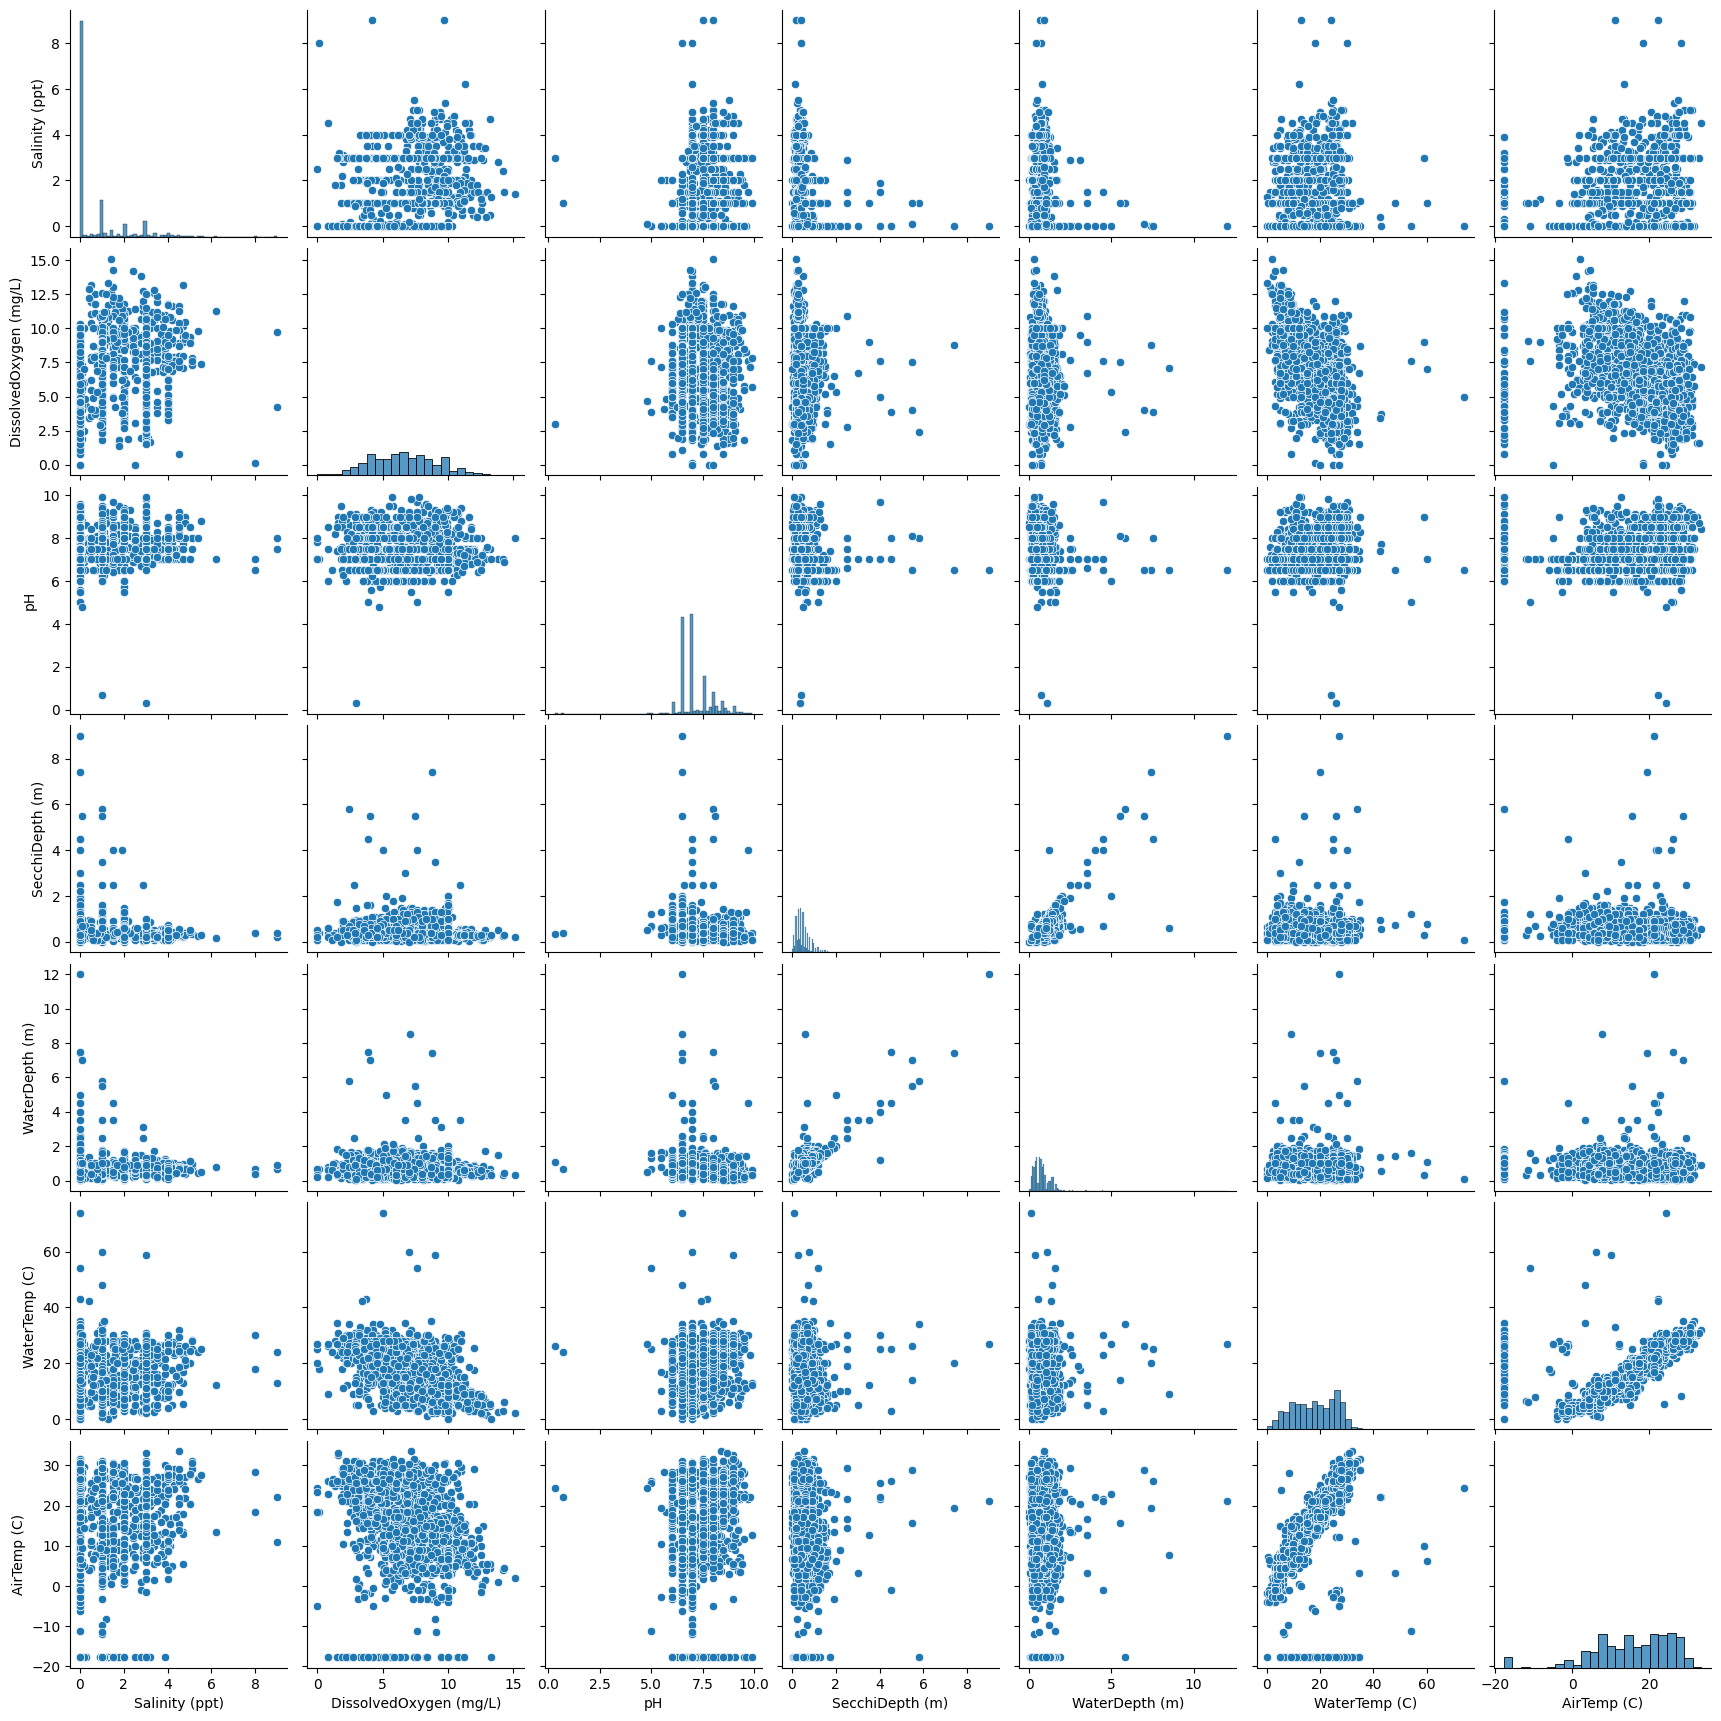

In [56]:
sns.pairplot(df)
plt.show()

In [71]:
data = data.drop(columns=['Date'])

In [72]:
imputer = SimpleImputer(strategy='mean')
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

In [73]:
X = data_imputed[['Salinity (ppt)', 'pH', 'SecchiDepth (m)', 'WaterDepth (m)', 'WaterTemp (C)', 'AirTemp (C)']]
y = data_imputed['DissolvedOxygen (mg/L)']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [75]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [76]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [77]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [79]:
print("Linear Regression - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression - MAE:", mean_absolute_error(y_test, y_pred_lr))

Linear Regression - RMSE: 1.645136924461824
Linear Regression - MAE: 1.2752686227544991


In [80]:
print("Random Forest - RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest - MAE:", mean_absolute_error(y_test, y_pred_rf))

Random Forest - RMSE: 1.5457287228915755
Random Forest - MAE: 1.192290323128875


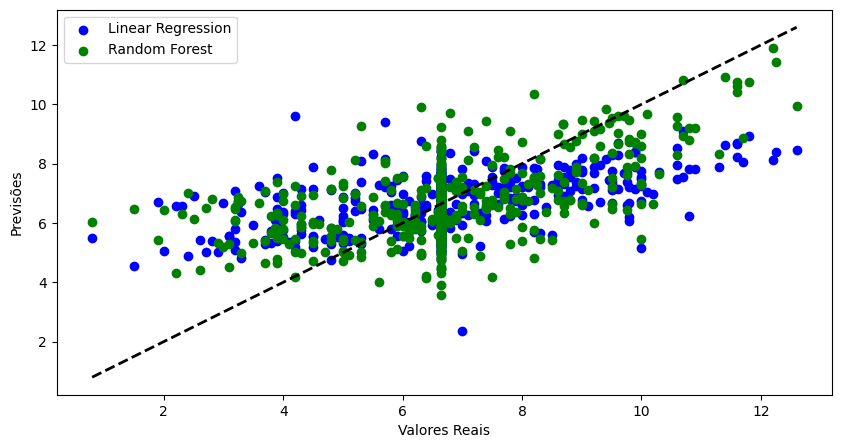

In [81]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.legend()
plt.show()

In [82]:
print("Análise e interpretação dos resultados:")
print("Os modelos de regressão linear e Random Forest foram treinados e avaliados.")
print("O modelo Random Forest apresentou melhor performance com menor RMSE e MAE.")

Análise e interpretação dos resultados:
Os modelos de regressão linear e Random Forest foram treinados e avaliados.
O modelo Random Forest apresentou melhor performance com menor RMSE e MAE.
